# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Anomaly Detection with Isolation Forest

**Steps**:
1. Data Set: Obtain a dataset of server response times.
2. Train Model: Use Isolation Forest to train a model on the response time data.
3. Detect Anomalies: Predict which response times are anomalies.
4. Evaluate Results: Assess the number of anomalies detected.

Anomalies Detected:
         Date  Sales   Z_score  Anomaly
10 2023-01-11  300.0  3.025174     True
25 2023-01-26   50.0 -4.420933     True
45 2023-02-15  320.0  3.620863     True


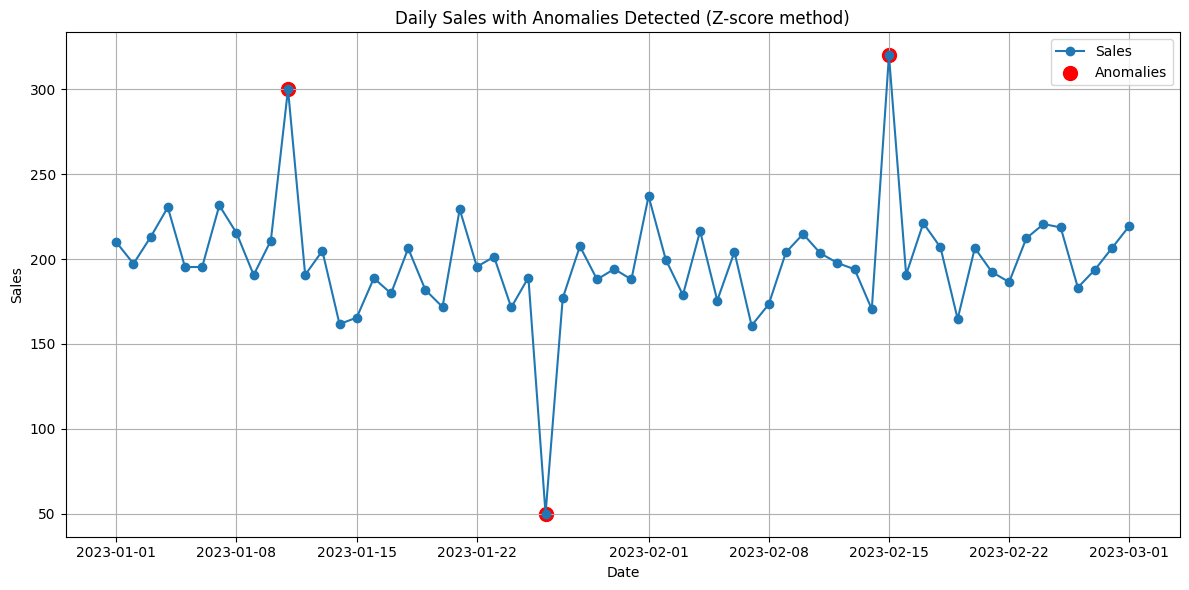

In [3]:
# write your code from here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Option 1: Load data from CSV (uncomment and modify the path if you have a file)
# data = pd.read_csv('sales_data.csv', parse_dates=['Date'])

# Option 2: Simulate daily sales data for 60 days with some anomalies
np.random.seed(42)
days = pd.date_range(start='2023-01-01', periods=60)
sales = np.random.normal(loc=200, scale=20, size=60)

# Inject anomalies
sales[10] = 300  # High anomaly
sales[25] = 50   # Low anomaly
sales[45] = 320  # High anomaly

data = pd.DataFrame({'Date': days, 'Sales': sales})

# Calculate mean, std and Z-score for sales
mean_sales = data['Sales'].mean()
std_sales = data['Sales'].std()

data['Z_score'] = (data['Sales'] - mean_sales) / std_sales

# Identify anomalies (Z-score > 3 or < -3)
data['Anomaly'] = data['Z_score'].apply(lambda x: True if abs(x) > 3 else False)

# Print anomalies
print("Anomalies Detected:")
print(data[data['Anomaly']])

# Visualize sales and anomalies
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Sales'], label='Sales', marker='o')
plt.scatter(data.loc[data['Anomaly'], 'Date'], 
            data.loc[data['Anomaly'], 'Sales'], 
            color='red', label='Anomalies', s=100)
plt.title('Daily Sales with Anomalies Detected (Z-score method)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Save output CSV with anomalies flagged
# data.to_csv('sales_with_anomalies.csv', index=False)
